## Introduction

You will undoubtedly use ``python`` (or Julia) and the accompanying Jupyter (or Pluto) notebooks for other coursework and in your future careers. In this course we shall use it for interpolating between rows in supersonic (with normal shocks) and isentropic flow tables, as well as for a coding assignment.  

This medium of coding is incredibly powerful and in my opinion makes for really efficient coding. I wish I had this when I was an undergraduate student. 

In the code blocks below, I will walk you through a very simple exercise of fitting a curve through a set of points. To begin, let us import a few libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The first library imported above is ``numpy``; it is a foundational package for scientific computing in ``python``. The second package imported is ``matplotlib``; it is useful for generating a myriad of plots that aid in visualizing data. Before we go ahead and try to fit a curve through a set of points, we need some points. Let us generate three points of the form:

$$
\large
\mathbf{x} = \left[ 0.1, 0.2, 0.3 \right] \; \; \textrm{and} \; \; f\left( x\right) = 3x^2 - 2.5 x+ 1
$$

For clarity, I will denote the vector $\mathbf{y} = f\left( \mathbf{x} \right)$.

In [2]:
x = np.array([0.1, 0.2, 0.3]).reshape(3,1)
y = 3*x**2 - 2.5 *x + 1.

Note the *reshaping* is done such that ``numpy`` understands that $x$ is a 3-by-1 vector. Let us plot this data.

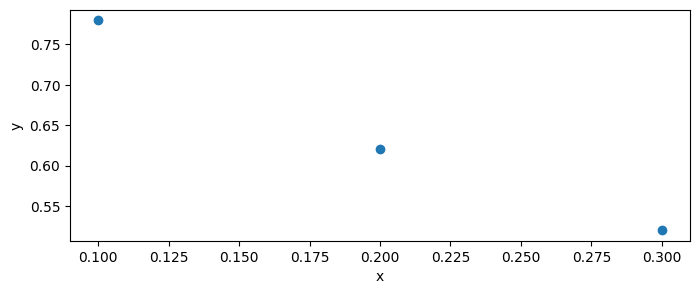

In [3]:
fig = plt.figure(figsize=(8,3))
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Curve fitting with least squares

To fit a curve through these points, we first need to decide what *basis* we should use. Do we want sines or cosines, fractions, exponentials, or just a quadratic polynomial? For now let us opt for a quadratic polynomial, as this results in a *linear* problem. The first thing we shall do is generate a matrix; lets call it $\mathbf{A}$. This matrix has the following form:

$$
\large
\mathbf{A}=\left[\begin{array}{ccc}
\mathbf{1} & \mathbf{x} & \mathbf{x}^{2}\end{array}\right]
$$

In [4]:
A = lambda x : np.hstack([np.ones((x.shape[0],1)), x, x**2 ])
print(A(x))

[[1.   0.1  0.01]
 [1.   0.2  0.04]
 [1.   0.3  0.09]]


Now what we will do is to solve

$$
\large
\mathbf{Au} = \mathbf{y}
$$

for the unknown coefficients $\mathbf{u}$. Another way of thinking about this equation is that we would like to minimize the *distance* between

$$
\large
\mathbf{Au} - \mathbf{y} 
$$

Mathematically, this distance is the standard Cartesian distance, i.e., *square root sum of the squares*. This is then written as

$$
\large
\underset{\mathbf{u}}{minimize} \; \; || \mathbf{Au} - \mathbf{y} ||_{2}^{2}
$$

While you will learn about many more such *distance* metrics in time, for the $L_2$ norm distance above, we can use the least squares approach that solves the normal equations under the hood. In ``python`` this is given by:

In [5]:
u = np.linalg.lstsq(A(x), y, rcond=None)[0]
print(u)

[[ 1. ]
 [-2.5]
 [ 3. ]]


This tells us what $\mathbf{u}$ is. Note that the first entry corresponds to the intercept; the second corresponds to the coefficient of the linear term, and the third is the quadratic coefficient. So we have figured out what the underlying function $f$ is! Yay! To plot this curve across a finer grid of points, we first generate a finer grid of points and call it $\hat{\mathbf{x}}$

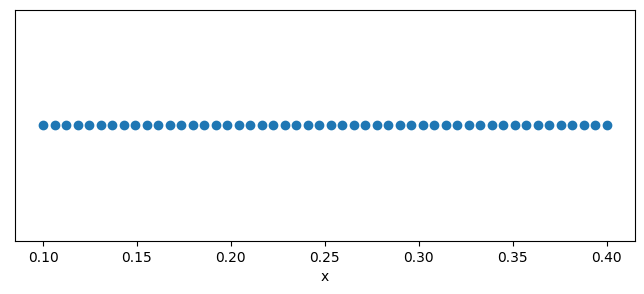

In [6]:
hat_x = np.linspace(0.1, 0.4, 50).reshape(50, 1)

fig = plt.figure(figsize=(8,3))
ax = plt.gca()
plt.plot(hat_x, hat_x*0,  'o')
plt.xlabel('x')
ax.get_yaxis().set_visible(False)
plt.show()

Finally, we evaluate the matrix $\hat{\mathbf{A}}$ at this finer set of points, i.e., 

$$
\large
\hat{\mathbf{A}}=\left[\begin{array}{ccc}
\mathbf{1} & \hat{\mathbf{x}} & \hat{\mathbf{x}}^{2}\end{array}\right]
$$

and multiply it by the obtained coefficients, i.e., $\hat{\mathbf{y}} = \hat{\mathbf{A}} \mathbf{u}$.

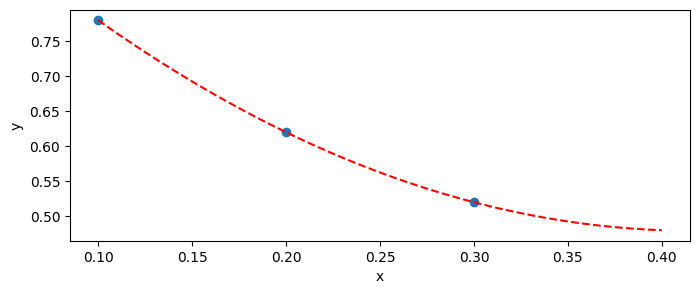

In [7]:
hat_y = A(hat_x) @ u # the @ is the dot operator, i.e., the dot product.

fig = plt.figure(figsize=(8,3)) 
plt.plot(x, y, 'o')
plt.plot(hat_x, hat_y, 'r--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()